In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../data/cleaned/amazon_india_2015_2025_cleaned.csv")
df.columns

Index(['transaction_id', 'order_date', 'customer_id', 'product_id',
       'product_name', 'category', 'subcategory', 'brand',
       'original_price_inr', 'discount_percent', 'discounted_price_inr',
       'quantity', 'subtotal_inr', 'delivery_charges', 'final_amount_inr',
       'customer_city', 'customer_state', 'customer_tier',
       'customer_spending_tier', 'customer_age_group', 'payment_method',
       'delivery_days', 'delivery_type', 'is_prime_member', 'is_festival_sale',
       'festival_name', 'customer_rating', 'return_status', 'order_month',
       'order_year', 'order_quarter', 'product_weight_kg', 'is_prime_eligible',
       'product_rating'],
      dtype='object')

In [3]:
df.dtypes

transaction_id             object
order_date                 object
customer_id                object
product_id                 object
product_name               object
category                   object
subcategory                object
brand                      object
original_price_inr        float64
discount_percent          float64
discounted_price_inr      float64
quantity                    int64
subtotal_inr              float64
delivery_charges          float64
final_amount_inr          float64
customer_city              object
customer_state             object
customer_tier              object
customer_spending_tier     object
customer_age_group         object
payment_method             object
delivery_days             float64
delivery_type              object
is_prime_member              bool
is_festival_sale             bool
festival_name              object
customer_rating           float64
return_status              object
order_month                 int64
order_year    

#### Question 11
- Create delivery performance analysis showing delivery days distribution, on-time performance, and customer satisfaction correlation with delivery speed across different cities and customer tiers.


In [4]:
df[["delivery_days", "delivery_type", "customer_rating"]].head()

,delivery_days,delivery_type,customer_rating
0,6.0,Standard,5.0
1,4.0,Standard,4.5
2,4.0,Standard,4.5
3,4.0,Standard,3.0
4,3.0,Standard,4.0


In [3]:
df["delivery_type"].unique()

array(['Standard', 'Same Day', 'Express'], dtype=object)

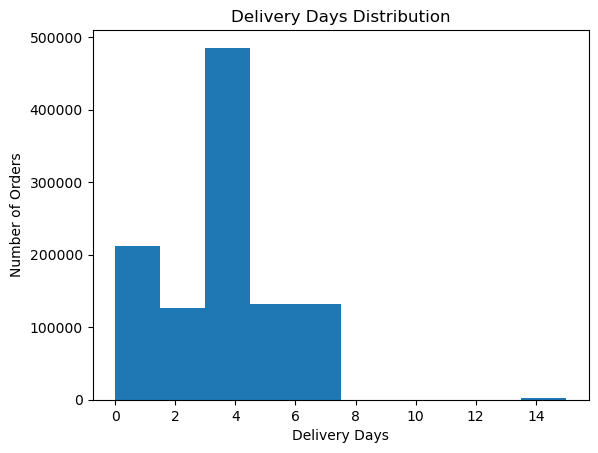

In [5]:
# Plot for performance analysis showing delivery days distribution

plt.hist(df['delivery_days'], bins=10)

plt.title("Delivery Days Distribution")
plt.xlabel("Delivery Days")
plt.ylabel("Number of Orders")
plt.show()

In [4]:
df["delivery_type"].value_counts()

delivery_type
Standard    758557
Same Day    207867
Express     124763
Name: count, dtype: int64

In [6]:
# on time performance if within 3 days i considered as on time else not
df['on_time'] = df['delivery_days'].apply(lambda x: 1 if x <= 3 else 0)

In [7]:
on_time_counts = df['on_time'].value_counts()
on_time_counts

on_time
1    624816
0    466371
Name: count, dtype: int64

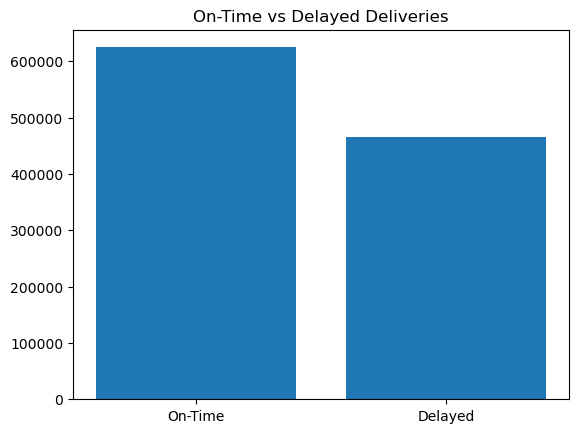

In [8]:
# plot for on time or delayed bar charts
plt.bar(['On-Time','Delayed'], on_time_counts)
plt.title("On-Time vs Delayed Deliveries")
plt.show()

In [9]:
corr = df['delivery_days'].corr(df['customer_rating'])
print("Correlation:", corr)

Correlation: -0.037902107826929377


In [10]:
# Avg delivery days per city
city_delivery = df.groupby("customer_city")["delivery_days"].mean().reset_index()
city_delivery = city_delivery.sort_values("delivery_days", ascending=False)
city_delivery

,customer_city,delivery_days
2,allahabad,3.505668
19,meerut,3.496421
25,saharanpur,3.477570
4,bareilly,3.473144
20,moradabad,3.440324
10,gorakhpur,3.440133
1,aligarh,3.429693
28,varanasi,3.403215
27,vadodara,3.369468
21,mumbai,3.368380


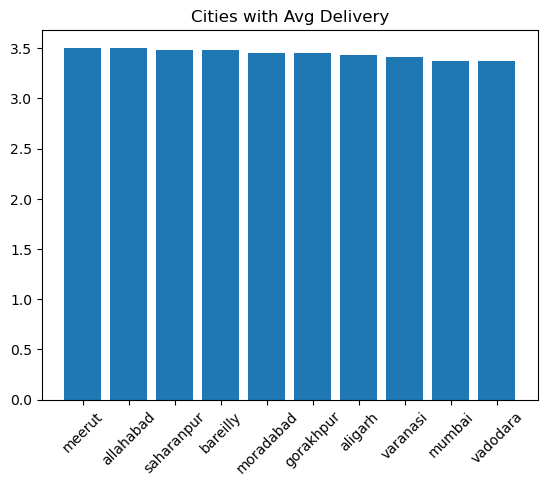

In [31]:
# Avg delivery days in bar plot
avg_cities = city_delivery.head(10)
plt.bar(avg_cities['customer_city'],
        avg_cities['delivery_days'])

plt.title("Cities with Avg Delivery")
plt.xticks(rotation=45)
plt.show()


In [11]:
tier_delivery = df.groupby('customer_tier')['delivery_days'].mean().reset_index()
tier_delivery

,customer_tier,delivery_days
0,Metro,3.363209
1,Rural,3.459217
2,Tier1,3.241261
3,Tier2,3.338746


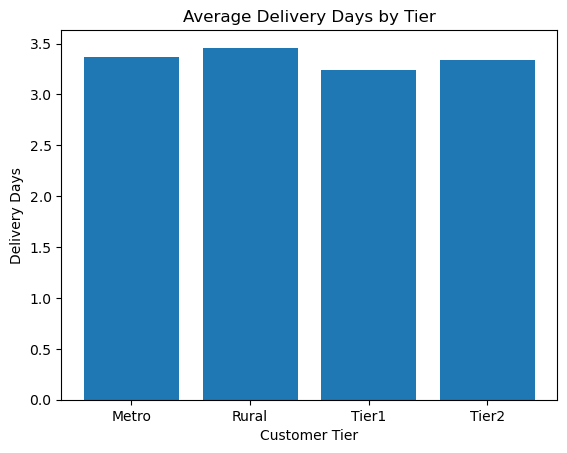

In [12]:
# PLot for customer tier bar chart
plt.bar(tier_delivery['customer_tier'],
        tier_delivery['delivery_days'])

plt.title("Average Delivery Days by Tier")
plt.xlabel("Customer Tier")
plt.ylabel("Delivery Days")
plt.show()

- Most deliveries are completed within 3 days
- On-time delivery rate is high, contributing to customer satisfaction
- A negative correlation between delivery days and customer ratings suggests faster delivery improves customer experience
- Metro cities show faster delivery times compared to Tier2 and Rural regions but not far beyond

#### Question 12
- Analyze return patterns and customer satisfaction using return rates, reasons, and correlation with product ratings, prices, and categories through multiple visualization techniques.


In [33]:
df["return_status"].value_counts()

return_status
Delivered    989385
Returned      76580
Cancelled     25222
Name: count, dtype: int64

In [34]:
returned_orders = len(df[df['return_status'] == 'Returned'])
return_rate = (returned_orders / len(df)) * 100
print("Return Rate:", return_rate)

Return Rate: 7.018045486245712


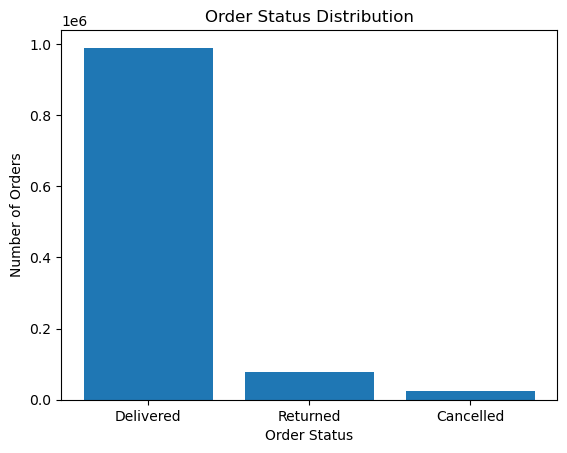

In [35]:
# bar plot of return status
status_counts = df['return_status'].value_counts()
plt.bar(status_counts.index,
        status_counts.values)

plt.title("Order Status Distribution")
plt.xlabel("Order Status")
plt.ylabel("Number of Orders")
plt.show()

In [36]:
df['is_returned'] = df['return_status'].apply(lambda x: 1 if x == 'Returned' else 0)

In [37]:
corr_rating = df['product_rating'].corr(df['is_returned'])
print("Correlation (Return vs Product Rating):", corr_rating)


Correlation (Return vs Product Rating): -0.04727060148591688


In [38]:
corr_price = df['discounted_price_inr'].corr(df['is_returned'])
print("Correlation (Return vs Price):", corr_price)

corr_price = df['final_amount_inr'].corr(df['is_returned'])
print("Correlation (Return vs Price):", corr_price)

corr_price = df['original_price_inr'].corr(df['is_returned'])
print("Correlation (Return vs Price):", corr_price)

Correlation (Return vs Price): -0.028686972668283458
Correlation (Return vs Price): -0.026393817628833315
Correlation (Return vs Price): -0.02973989438613083


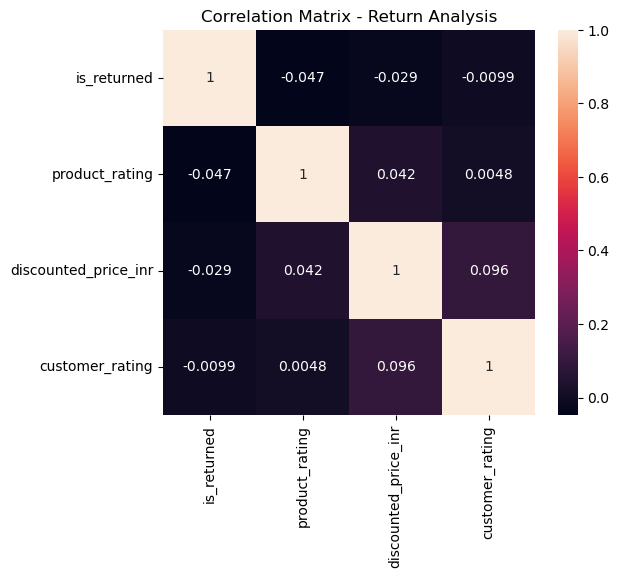

In [39]:
corr_matrix = df[['is_returned',
                  'product_rating',
                  'discounted_price_inr',
                  'customer_rating']].corr()

plt.figure(figsize=(6,5))
sns.heatmap(corr_matrix, annot=True)
plt.title("Correlation Matrix - Return Analysis")
plt.show()

- Heatmap shows all the posibilities of return
- Return status shows a negative correlation with product rating same for discount price inr and customer rating

#### Question 13
- Study brand performance and market share evolution. Create brand comparison charts, market share trends, and competitive positioning analysis across different categories.


In [40]:
brand_revenue = df.groupby('brand')['final_amount_inr'].sum().reset_index()
brand_revenue = brand_revenue.sort_values('final_amount_inr', ascending=False)
brand_revenue.head(10)


,brand,final_amount_inr
22,Samsung,1.836759e+10
4,Apple,1.302049e+10
19,OnePlus,1.163228e+10
27,Xiaomi,5.264398e+09
21,Realme,2.871872e+09
26,Vivo,2.271152e+09
20,Oppo,2.193663e+09
14,Lenovo,1.878047e+09
2,Alienware,1.410316e+09
0,ASUS,1.247816e+09


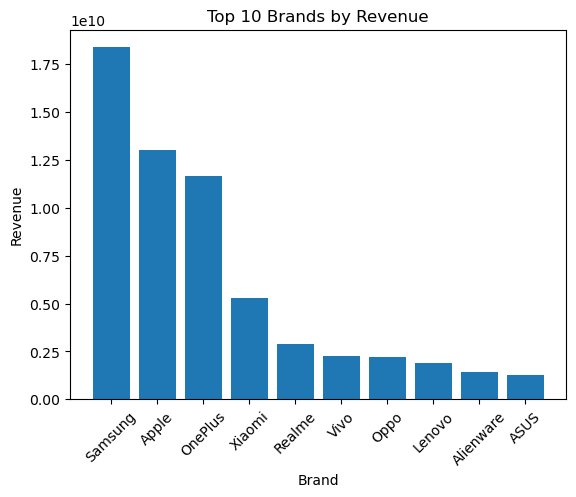

In [41]:
# bar char for top brands

top_brands = brand_revenue.head(10)
plt.bar(top_brands['brand'],
        top_brands['final_amount_inr'])

plt.title("Top 10 Brands by Revenue")
plt.xlabel("Brand")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.show()

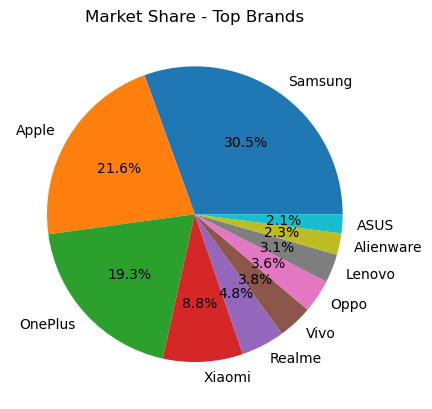

In [42]:
# chart for showing market share according to brand
plt.pie(top_brands['final_amount_inr'], labels=top_brands['brand'], autopct='%1.1f%%')
plt.title("Market Share - Top Brands")
plt.show()

- Samsung leads the overall market with highest revenue share
- followed by apple and one plus

#### Question 15
- Analyze discount and promotional effectiveness. Create discount impact analysis showing correlation between discount percentages, sales volumes, and revenue across categories and time periods.



In [43]:
print(df[["discount_percent", "quantity"]].value_counts())
print(df["quantity"].value_counts())
print(df["discount_percent"].value_counts())

discount_percent  quantity
0.00              1           391612
                  2            73266
                  3            24785
25.33             1              171
24.46             1              169
                               ...  
54.76             3                1
41.72             3                1
41.71             3                1
48.27             3                1
48.22             3                1
Name: count, Length: 19335, dtype: int64
quantity
1    872987
2    163458
3     54742
Name: count, dtype: int64
discount_percent
0.00     489663
25.33       212
29.17       211
22.83       209
24.63       209
          ...  
44.10        40
39.27        38
68.23        37
68.84        37
70.00        27
Name: count, Length: 6502, dtype: int64


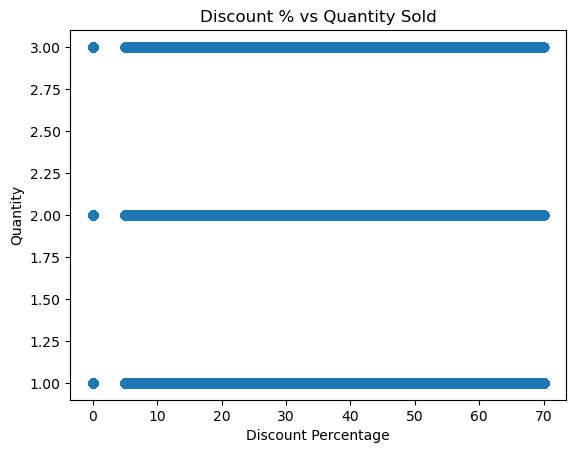

In [44]:
# Plot to show relation between quantity and discount percentage
plt.scatter(df['discount_percent'],
            df['quantity'])

plt.title("Discount % vs Quantity Sold")
plt.xlabel("Discount Percentage")
plt.ylabel("Quantity")
plt.show()

In [45]:
corr_discount_quantity = df['discount_percent'].corr(df['quantity'])
print("Correlation (Discount vs Quantity):", corr_discount_quantity)
# there is almost no relation with dicsount and quantity

Correlation (Discount vs Quantity): -0.0008961372723449129


In [46]:
corr_discount_revenue = df['discount_percent'].corr(df['final_amount_inr'])
print("Correlation (Discount vs Revenue):", corr_discount_revenue)
# it has negative correlation discount reduce reveuue

Correlation (Discount vs Revenue): -0.28315890246334957


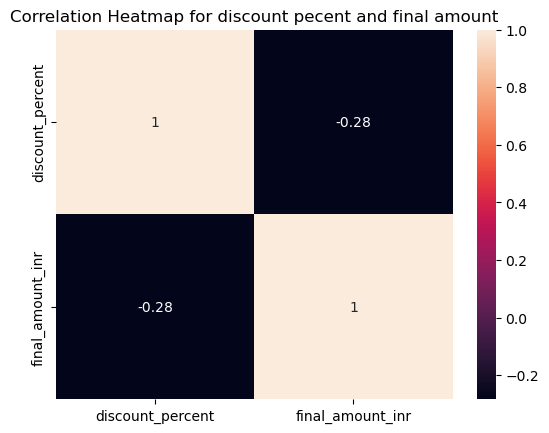

In [51]:
sns.heatmap(df[['discount_percent', 'final_amount_inr']].corr(), annot=True)
plt.title("Correlation Heatmap for discount pecent and final amount")
plt.show()

In [5]:
year_discount = df.groupby('order_year').agg({
    'discount_percent':'mean',
    'quantity':'sum',
    'final_amount_inr':'sum'
}).reset_index()

year_discount


,order_year,discount_percent,quantity,final_amount_inr
0,2015,17.738695,40022,1.955959e+09
1,2016,17.584790,67056,3.287019e+09
2,2017,17.686149,93770,4.968091e+09
3,2018,17.654422,120316,6.441373e+09
4,2019,17.712559,146776,7.709617e+09
5,2020,17.179219,173935,1.030614e+10
6,2021,17.292869,167245,9.515901e+09
7,2022,17.289247,160416,7.677261e+09
8,2023,17.289166,153750,6.981461e+09
9,2024,17.333475,147056,6.217602e+09


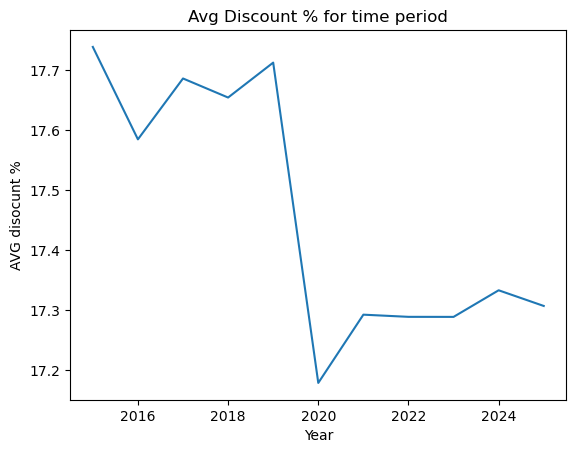

In [6]:
# Plot for time periods
plt.Figure()
plt.plot(year_discount["order_year"], year_discount["discount_percent"])
plt.title("Avg Discount % for time period")
plt.xlabel("Year")
plt.ylabel("AVG disocunt %")
plt.show()

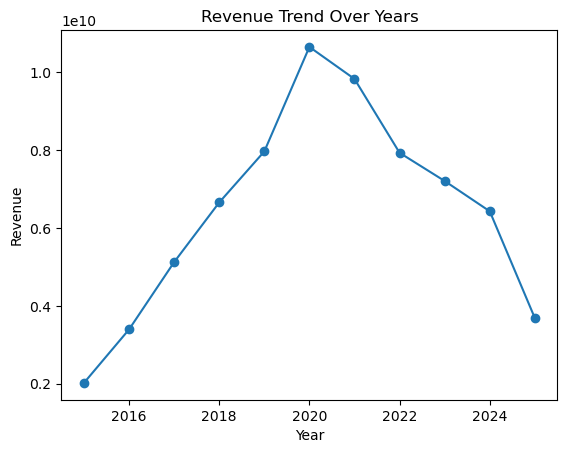

In [ ]:
# plot for revenue over years
plt.plot(year_discount['order_year'],
         year_discount['final_amount_inr'],
         marker='o')

plt.title("Revenue Trend Over Years")
plt.xlabel("Year")
plt.ylabel("Revenue")
plt.show()

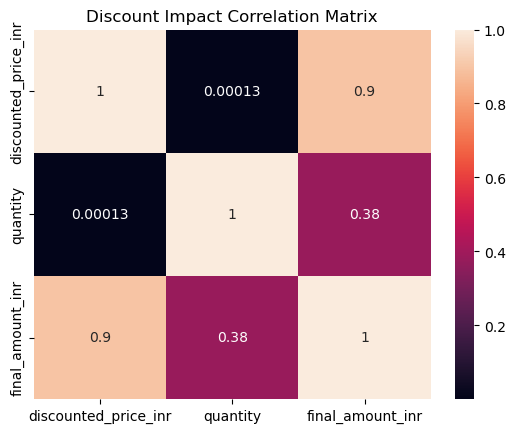

In [8]:
# correlation between discount, quantity and final amount
corr_matrix = df[['discounted_price_inr',
                  'quantity',
                  'final_amount_inr']].corr()

sns.heatmap(corr_matrix, annot=True)
plt.title("Discount Impact Correlation Matrix")
plt.show()

- Discount percentage shows a no correlation with quantity sold
- the correlation between discount and revenue is moderate

#### Question 16
- Study product rating patterns and their impact on sales. Analyze rating distributions, correlation with sales performance, and identify patterns across categories and price ranges.


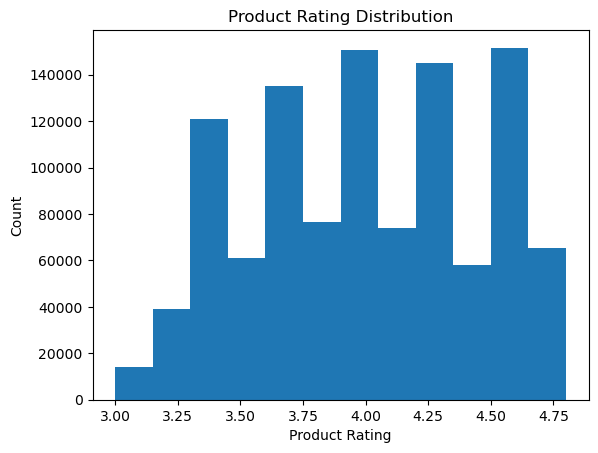

In [9]:
# Rating distibution
plt.hist(df['product_rating'], bins=12)

plt.title("Product Rating Distribution")
plt.xlabel("Product Rating")
plt.ylabel("Count")
plt.show()

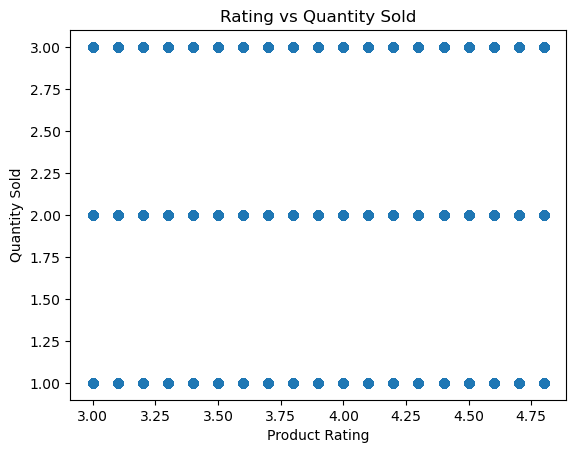

In [55]:
# Rating vs sales performace
plt.scatter(df['product_rating'], df['quantity'])

plt.title("Rating vs Quantity Sold")
plt.xlabel("Product Rating")
plt.ylabel("Quantity Sold")
plt.show()

In [56]:
corr_rating_quantity = df['product_rating'].corr(df['quantity'])
print("Correlation (Rating vs Quantity):", corr_rating_quantity)
# there is almost no relation

Correlation (Rating vs Quantity): 0.0005821006537617016


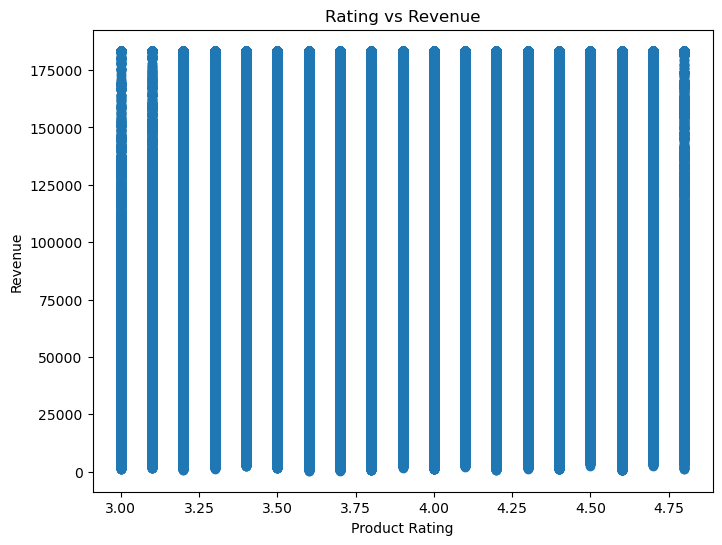

In [57]:
# Rating vs Revenue plot
plt.figure(figsize=(8,6))
plt.scatter(df['product_rating'], df['final_amount_inr'])

plt.title("Rating vs Revenue")
plt.xlabel("Product Rating")
plt.ylabel("Revenue")
plt.show()


In [58]:
corr_rating_revenue = df['product_rating'].corr(df['final_amount_inr'])
print("Correlation (Rating vs Revenue):", corr_rating_revenue)
# this to have almost no relation between revnue and rating

Correlation (Rating vs Revenue): 0.03780190726034843


In [59]:
# price ranges
df['price_range'] = pd.cut(df['final_amount_inr'], bins=4, labels=['Low','Medium','High','Premium'])
df["price_range"].head()

0    Medium
1    Medium
2      High
3       Low
4      High
Name: price_range, dtype: category
Categories (4, object): ['Low' < 'Medium' < 'High' < 'Premium']

In [60]:
price_rating = df.groupby('price_range')['product_rating'].mean().reset_index()
price_rating

C:\Users\HopeR\AppData\Local\Temp\ipykernel_11708\2888733891.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_rating = df.groupby('price_range')['product_rating'].mean().reset_index()


,price_range,product_rating
0,Low,3.954047
1,Medium,3.993176
2,High,4.011967
3,Premium,3.991677


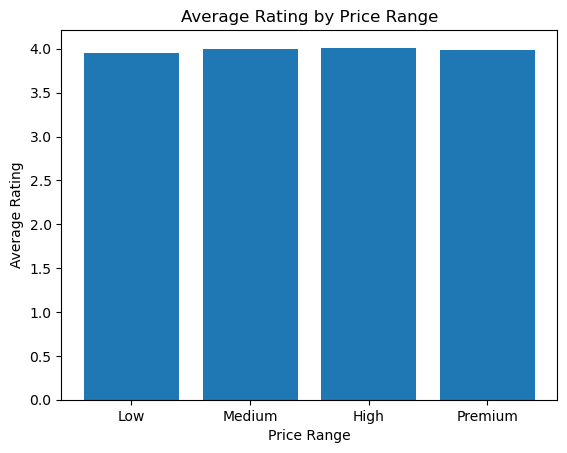

In [61]:
plt.bar(price_rating['price_range'],
        price_rating['product_rating'])

plt.title("Average Rating by Price Range")
plt.xlabel("Price Range")
plt.ylabel("Average Rating")
plt.show()

- there is no relation between rating and sales
- there is almost no relation between rating and reveune
- the procducts are sold evenly across all price ranges

#### Question 17
- Create customer journey analysis showing purchase frequency patterns, category transitions, and customer evolution from first purchase to loyal customers using flow diagrams and transition matrices.


In [63]:
customer_orders = df.groupby('customer_id')['transaction_id'].count().reset_index()
customer_orders.rename(columns={'transaction_id':'order_count'}, inplace=True)
customer_orders.head()


,customer_id,order_count
0,CUST_2015_00000001,4
1,CUST_2015_00000002,9
2,CUST_2015_00000003,8
3,CUST_2015_00000004,8
4,CUST_2015_00000005,5


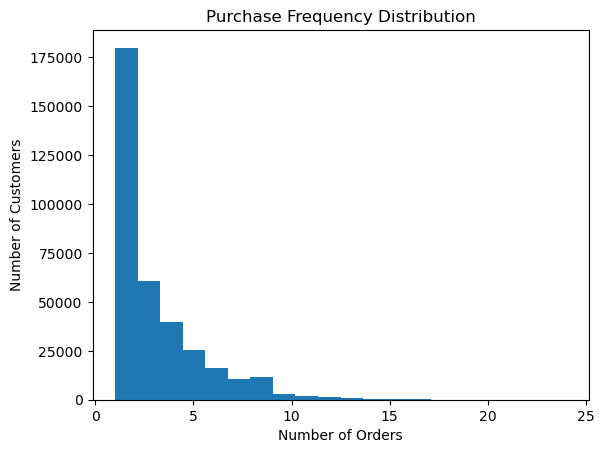

In [64]:
# order and no of customer hist diagram
plt.hist(customer_orders['order_count'], bins=20)

plt.title("Purchase Frequency Distribution")
plt.xlabel("Number of Orders")
plt.ylabel("Number of Customers")
plt.show()

In [65]:
# function seperate firsttime repeat aqnd loyal customer accoring to my assumption
def segment(x):
    if x == 1:
        return "First-Time"
    elif x <= 5:
        return "Repeat"
    else:
        return "Loyal"

customer_orders['customer_segment'] = customer_orders['order_count'].apply(segment)

customer_orders.head()

,customer_id,order_count,customer_segment
0,CUST_2015_00000001,4,Repeat
1,CUST_2015_00000002,9,Loyal
2,CUST_2015_00000003,8,Loyal
3,CUST_2015_00000004,8,Loyal
4,CUST_2015_00000005,5,Repeat


In [66]:
segment_counts = customer_orders['customer_segment'].value_counts()
segment_counts

customer_segment
Repeat        211962
First-Time     93843
Loyal          46035
Name: count, dtype: int64

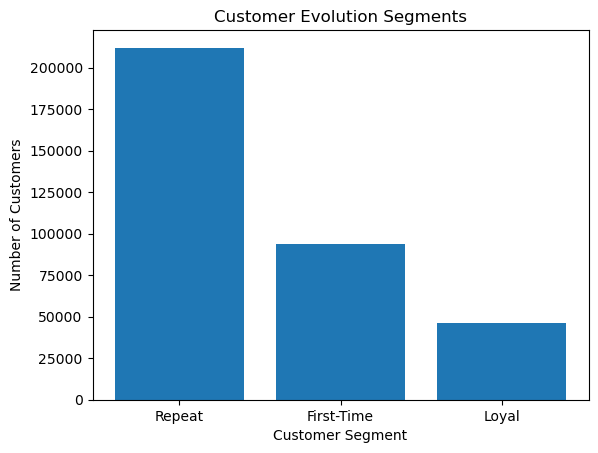

In [68]:
plt.bar(segment_counts.index, segment_counts.values)

plt.title("Customer Evolution Segments")
plt.xlabel("Customer Segment")
plt.ylabel("Number of Customers")
plt.show()

- According to this repeat is more than loyal according to my assumption
- first timer are in middle segment

#### Question 18
- Analyze inventory and product lifecycle patterns. Study product launch success, decline phases, and category evolution over the decade with detailed trend analysis.


In [10]:
# launch year of the product
product_launch = df.groupby('product_id')['order_year'].min().reset_index()
product_launch.rename(columns={'order_year':'launch_year'}, inplace=True)
product_launch.head()


,product_id,launch_year
0,PROD_000001,2015
1,PROD_000002,2015
2,PROD_000003,2015
3,PROD_000004,2015
4,PROD_000005,2015


In [11]:
df = df.merge(product_launch, on='product_id', how='left')

In [12]:
df["launch_year"].value_counts()

launch_year
2015    208121
2016    163185
2017    156834
2018    141603
2019    140515
2020    106342
2021     69347
2022     44225
2023     34982
2024     19346
2025      6687
Name: count, dtype: int64

In [15]:
launch_sales = df[df['order_year'] == df['launch_year']]
launch_sales.shape

(236660, 35)

In [14]:
launch_performance = launch_sales.groupby('product_id')['final_amount_inr'].sum().reset_index()
launch_performance.head()

,product_id,final_amount_inr
0,PROD_000001,13036571.10
1,PROD_000002,9505177.12
2,PROD_000003,38909621.38
3,PROD_000004,10045146.65
4,PROD_000005,29959286.00


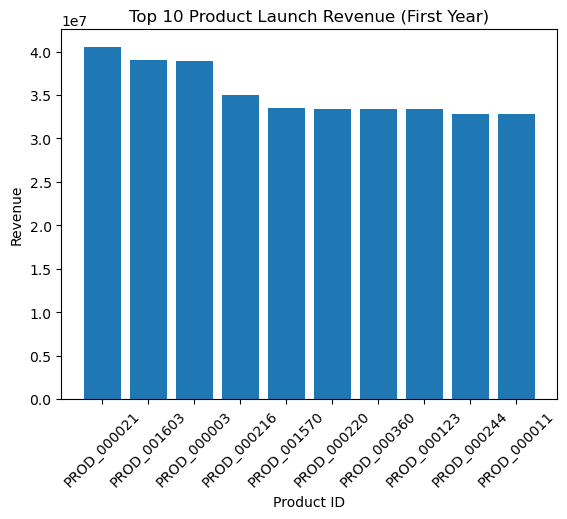

In [16]:
top_launch = launch_performance.sort_values('final_amount_inr', ascending=False).head(10)
plt.bar(top_launch['product_id'], top_launch['final_amount_inr'])

plt.title("Top 10 Product Launch Revenue (First Year)")
plt.xlabel("Product ID")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.show()

In [79]:
product_year = df.groupby(['product_id','order_year'])['final_amount_inr'].sum().reset_index()
product_year

,product_id,order_year,final_amount_inr
0,PROD_000001,2015,13036571.10
1,PROD_000001,2016,8456341.80
2,PROD_000001,2017,9466482.57
3,PROD_000001,2018,9110576.47
4,PROD_000001,2019,8605639.18
...,...,...,...
11684,PROD_002004,2021,6227386.95
11685,PROD_002004,2022,4778955.67
11686,PROD_002004,2023,9834104.54
11687,PROD_002004,2024,11978166.82


    product_id  order_year  final_amount_inr
0  PROD_000001        2015       13036571.10
1  PROD_000001        2016        8456341.80
2  PROD_000001        2017        9466482.57
3  PROD_000001        2018        9110576.47
4  PROD_000001        2019        8605639.18


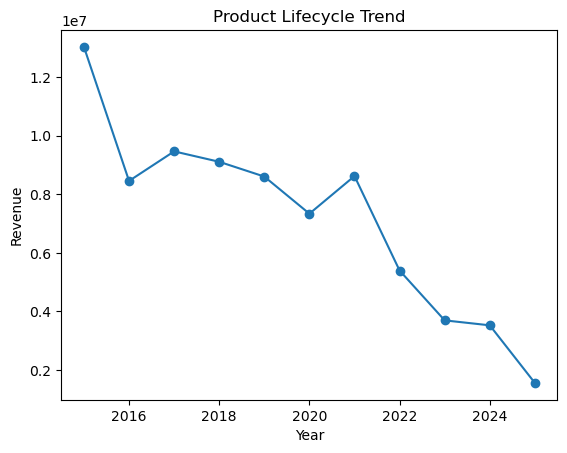

In [80]:
sample_product = product_year[product_year['product_id'] == product_year['product_id'].iloc[0]]
print(sample_product.head())

plt.plot(sample_product['order_year'],
         sample_product['final_amount_inr'],
         marker='o')

plt.title("Product Lifecycle Trend")
plt.xlabel("Year")
plt.ylabel("Revenue")
plt.show()


- while lanunching all procuct get high sales and revenue
- when years move forward the product is sale is decline

#### Question 19
- Build competitive pricing analysis comparing brand positioning, price ranges, and market penetration strategies across different product categories using box plots and competitive matrices.


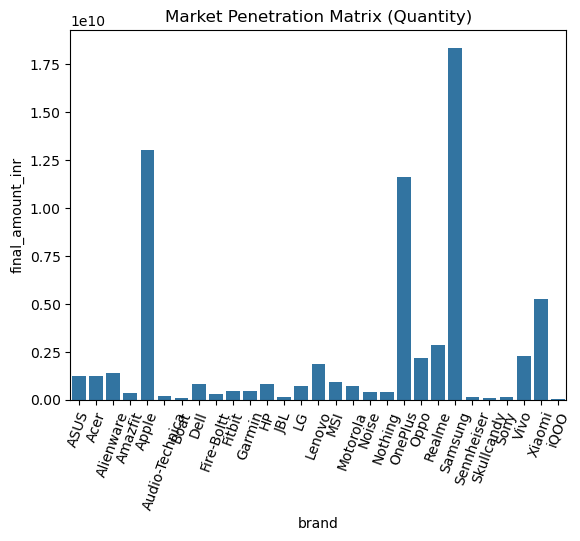

In [24]:
brand_postion = df.groupby("brand")["final_amount_inr"].sum().reset_index()
sns.barplot(data= brand_postion, x=brand_postion["brand"], y=brand_postion["final_amount_inr"])
plt.title("Market Penetration Matrix (Quantity)")
plt.xticks(rotation=70)
plt.show()